In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

On va importer les données.

In [42]:
data_url = "Subject6_smoking.csv"

On observe le jeu de données.

In [46]:
data = pd.read_csv(data_url, encoding = 'iso-8859-1')
data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

Il n'y a pas de donnée manquante dans le jeu de données.  
Il ne faut donc pas enlever de lignes.  
On cherche à comptabiliser le nombre de femmes fumeuses qui sont vivantes et mortes, de même pour les non-fumeuses.  
On crée un jeu de données en utilisant les fonctions prédéfinies dans la bibliothèque Pandas.


In [47]:
resultat = data.groupby(["Smoker","Status"])["Age"].nunique()

Maintenant, on crée un jeu de données pour afficher les données sous-forme d'un tableau, en y ajoutant le taux de mortalité pour les femmes fumeuses (en divisant le nombre de femmes fumeuses décédées par le nombre de femmes fumeuses total) et pour les femmes non-fumeuses.

In [48]:
non_fum_vivante = resultat[0]
non_fum_morte = resultat[1]
fum_vivante = resultat[2]
fum_morte = resultat[3]

données=[[fum_morte,fum_vivante,fum_morte+fum_vivante,round(fum_morte/(fum_morte+fum_vivante),3)],[non_fum_morte,non_fum_vivante,non_fum_morte+non_fum_vivante,round(non_fum_morte/(non_fum_morte+non_fum_vivante),3)]]
res = pd.DataFrame(données, index = ["Fumeuses", "Non-fumeuses"] , columns = ["Décédées", "Vivantes","Total","Taux de mortalité"])
res


Décédées  Vivantes  Total  Taux de mortalité
Fumeuses           121       274    395              0.306
Non-fumeuses       184       323    507              0.363

On observe les données finales dans un graphe.

<BarContainer object of 2 artists>

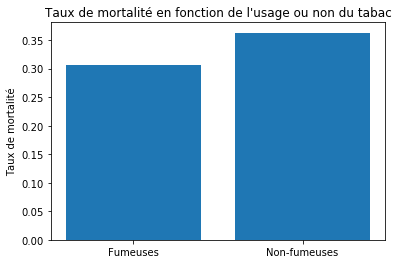

In [49]:
plt.title("Taux de mortalité en fonction de l'usage ou non du tabac")
plt.ylabel("Taux de mortalité")
plt.bar(res.index,res["Taux de mortalité"])

On observe que le taux de mortalité est plus important chez les non-fumeuses (0.363) que chez les fumeuses (0.306).
C'est un résultat surprenant : on aurait attendu l'inverse.   
On va chercher à utiliser les valeurs selon l'âge. On trie donc les valeurs selon celui-ci.

In [50]:
data_sorted = data.sort_values(by="Age")
data_sorted

Smoker Status   Age
654     Yes  Alive  18.0
1132    Yes  Alive  18.0
832     Yes  Alive  18.0
220     Yes  Alive  18.0
24       No  Alive  18.0
922     Yes  Alive  18.1
206     Yes  Alive  18.1
449     Yes  Alive  18.1
91       No  Alive  18.3
168      No  Alive  18.3
1107     No  Alive  18.3
47       No  Alive  18.5
701     Yes  Alive  18.5
282      No  Alive  18.5
98      Yes  Alive  18.6
685      No  Alive  18.6
94      Yes  Alive  18.6
774     Yes  Alive  18.7
1138     No  Alive  18.7
788      No  Alive  18.8
1075     No  Alive  18.8
79       No  Alive  18.9
539      No  Alive  18.9
195      No  Alive  19.0
688      No  Alive  19.0
951      No  Alive  19.1
1128     No  Alive  19.1
615      No  Alive  19.2
929      No  Alive  19.2
1       Yes  Alive  19.3
...     ...    ...   ...
468     Yes   Dead  86.8
150      No   Dead  86.8
483      No  Alive  86.9
183      No   Dead  87.0
512      No  Alive  87.4
196      No   Dead  87.6
883      No  Alive  87.6
823      No   Dead  87.6
278      No   Dead  87.7
129     Yes   Dead  87.8
536     Yes   Dead  87.9
1222    Yes   Dead  87.9
1225     No   Dead  87.9
1152     No   Dead  88.0
545      No   Dead  88.1
657     Yes   Dead  88.3
932      No   Dead  88.4
131      No   Dead  88.4
507      No   Dead  88.5
1080    Yes   Dead  88.6
1312     No   Dead  88.6
525     Yes   Dead  88.7
393      No   Dead  88.8
201     Yes   Dead  89.2
1246     No   Dead  89.2
114      No   Dead  89.3
1126     No   Dead  89.5
163      No   Dead  89.7
369      No  Alive  89.7
1108     No   Dead  89.9

[1314 rows x 3 columns]

On regroupe les données dans quatre classes :
    - la première pour les individus de 18 ans compris à 34 ans non-compris.
    - la deuxième pour ceux de 34 ans compris à 55 ans non-compris.
    - la troisième pour les individus 55 ans compris à 65 ans non-compris.
    - la quatrième pour les individus de plus de 65 ans.

In [51]:
classe1 = data_sorted[(data_sorted.Age>=18) & (data_sorted.Age<34)]
classe2 = data_sorted[(data_sorted.Age>=34) & (data_sorted.Age<55)]
classe3 = data_sorted[(data_sorted.Age>=55) & (data_sorted.Age<65)]
classe4 = data_sorted[(data_sorted.Age>=65)]

On réalise sur chaque classe la même chose qu'on a effectué sur la série entière. On crée donc une fonction pour pouvoir la réutiliser sur les quatre classes.

<BarContainer object of 8 artists>

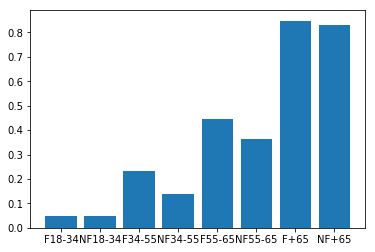

In [52]:
def regroupement(data):
    resultat = data.groupby(["Smoker","Status"])["Age"].nunique()
    non_fum_vivante = resultat[0]
    non_fum_morte = resultat[1]
    fum_vivante = resultat[2]
    fum_morte = resultat[3]

    données=[[fum_morte,fum_vivante,fum_morte+fum_vivante,round(fum_morte/(fum_morte+fum_vivante),3)],[non_fum_morte,non_fum_vivante,non_fum_morte+non_fum_vivante,round(non_fum_morte/(non_fum_morte+non_fum_vivante),3)]]
    sortie = pd.DataFrame(données, index = ["Fumeuses", "Non-fumeuses"] , columns = ["Décédées", "Vivantes","Total","Taux de mortalité"])
    return sortie

plt.bar(["F18-34","NF18-34","F34-55","NF34-55","F55-65","NF55-65","F+65","NF+65"],concatenation["Taux de mortalité"])


On appelle la fonction avec chaque classe.

In [53]:
d1=regroupement(classe1)
d2=regroupement(classe2)
d3=regroupement(classe3)
d4=regroupement(classe4)

On concatène toutes les classes étant donné qu'elles ont les mêmes colums.

In [54]:
concatenation=pd.concat([d1,d2,d3,d4])

On affiche toutes les données dans un graphe.

<BarContainer object of 8 artists>

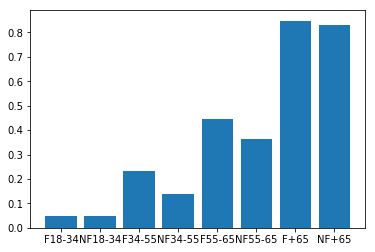

In [55]:
plt.bar(["F18-34","NF18-34","F34-55","NF34-55","F55-65","NF55-65","F+65","NF+65"],concatenation["Taux de mortalité"])

D'après le graphique précédent, on observe que pour la tranche 18-34 ans, le taux de mortalité entre les fumeurs et les non-fumeurs est presque semblable.                
Au contraire, on observe que sur les trois autres tranches d'âge, le taux de mortalité pour les fumeurs est plus élevé que le taux de mortalité des non-fumeurs.    
Ce qui est contraire aux résultats trouvés précédemment pour l'ensemble de la série de données.    
Cela peut s'expliquer par le fait que l'échantillon dans chaque sous-groupe n'est pas le même (le nombre de fumeurs décédés ou vivants, et le nombre de non-fumeurs décédés et vivants n'est pas le même).

Il m'est impossible d'effectuer une régression logistique.